# This notebook contains the final regression analysis code

It follows from the data generated in the notebook called "Prepare_WESE_analysisData"

In [1]:
## Load libraries
libs<-c("ggplot2","plyr","dplyr","jsonlite","plot3D","caret","plotROC","lmtest")
lapply(libs, require, character.only = TRUE)
pathToLocalGit<-"~/Workspace/ContinentalWESEestimates/"

## Load the source utility functions file
source(file=paste0(pathToLocalGit,"scripts/fitRegressionModels_functions.R"))

#load the data
load(file="~/Workspace/ContinentalWESEestimates/data/WESEdata_forContinentalAnalyses.RData")

Loading required package: ggplot2

Loading required package: plyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: jsonlite

Loading required package: plot3D

Loading required package: caret

Loading required package: lattice

Loading required package: plotROC

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

### Here are the covariates to use in the models.
Use linear and quadratic forms for the numerics, and combinations between numerics and factors. Quadratics must be added to the equation as so: I(distToShore^2). Combining numerics and factors means a slope of the numeric for each level of the factor.   
   
Numeric:   
  * scaledmeanslope   
  * logmeanbathy  
  * logglacierdist  
  * logdistToShore  
  * logcont300dist  
  * logcont800dist  
  * logdistNearestIceEdge  
  * logfastIceWidth  
  * logempedist  
  * logadpedist  
  * logADPEabund  
  * logEMPEabund  
  * fastIceRatio  
  * Persistence2Years (3 levels: 0, 1, 2)  
  * PredictabilityDec5Years (6 levels: 0, 1,...,5)
  * Persistence3Years (4 levels: 0, 1, 2, 3)  
  * PredictabilityOct5Years (6 levels: 0, 1,...,5)
  
Factors:  
  * DecemberIcePresence (0/1)    
  * InCanyon (0/1)  
  * InTrough (0/1)  
  * Region - reference: Ross Sea
  * adpepresent (0/1)

In [2]:
#THIS IS THE "FULL" MODEL as per convo July 6 US-time
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
## Note: not indicating the family so it defaults to "gaussian" and fits a simple regression

In [3]:
gofres<-summarizeResults(fitobj=reslst,what="gof")
print(gofres)

                  Parameter     Value Nboot
Df                       Df  2885.000   100
AIC                     AIC  2956.328   100
LogLik               LogLik -1439.164   100
ResidDeviance ResidDeviance  2878.328   100


Let's examine the results, starting with a summary of the coefficients. For this we use the function "summarizeResults". The function has two arguments: the fitobj is the object resulting from using the fitModelToBootstrap function above (in our example, fitobj is reslst), and the "what" parameter. This parameter has three possible values: "coefs", "gof", or "resids". The latter is the vector of average residuals. Let's look at the coefficients and the goodness-of-fit results.

In [4]:
coefres<-summarizeResults(fitobj=reslst,what="coefs")
row.names(coefres)<-NULL
print(coefres)

                                Parameter Coefficient StError z_value Prob_t
1                             (Intercept)      91.625  14.321   6.386  0.000
2                         scaledmeanslope       0.337   0.154   2.199  0.071
3                    I(scaledmeanslope^2)      -0.079   0.035  -2.278  0.068
4                            logmeanbathy       0.261   0.083   3.119  0.013
5                           adpepresentno     -17.469   4.071  -4.291  0.001
6                             logadpedist       2.721   0.973   2.806  0.020
7                           empepresentno      11.751   3.637   3.174  0.016
8                             logempedist     -12.317   1.571  -7.804  0.000
9                        I(logempedist^2)       0.559   0.075   7.463  0.000
10                       I(logadpedist^2)      -0.166   0.053  -3.156  0.009
11                           logEMPEabund      -0.140   0.047  -2.956  0.013
12                           logADPEabund      -0.024   0.047  -0.503  0.522

## Evaluating goodness of fit
Here we calculate the confusion matrix statistics from all the bootstrap results combined, and plot the ROC curve with all the bootstrap results combined

,bootstrap,predicted,residual,observed
,<int>,<dbl>,<dbl>,<dbl>
1,1,0.1213897,-1.138161,0
2,1,0.2304915,-1.299531,0
3,1,0.2461203,-1.326472,0
4,1,0.4522252,-1.825568,0
5,1,0.2934868,-1.415402,0
6,1,0.1025082,-1.114216,0


Confusion Matrix and Statistics

          Reference
Prediction      A      P
         A 111745  36666
         P  34455 109534
                                          
               Accuracy : 0.7568          
                 95% CI : (0.7552, 0.7583)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5135          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7492          
            Specificity : 0.7643          
         Pos Pred Value : 0.7607          
         Neg Pred Value : 0.7529          
             Prevalence : 0.5000          
         Detection Rate : 0.3746          
   Detection Prevalence : 0.4924          
      Balanced Accuracy : 0.7568          
                                          
       'Positive' Class : P               
            

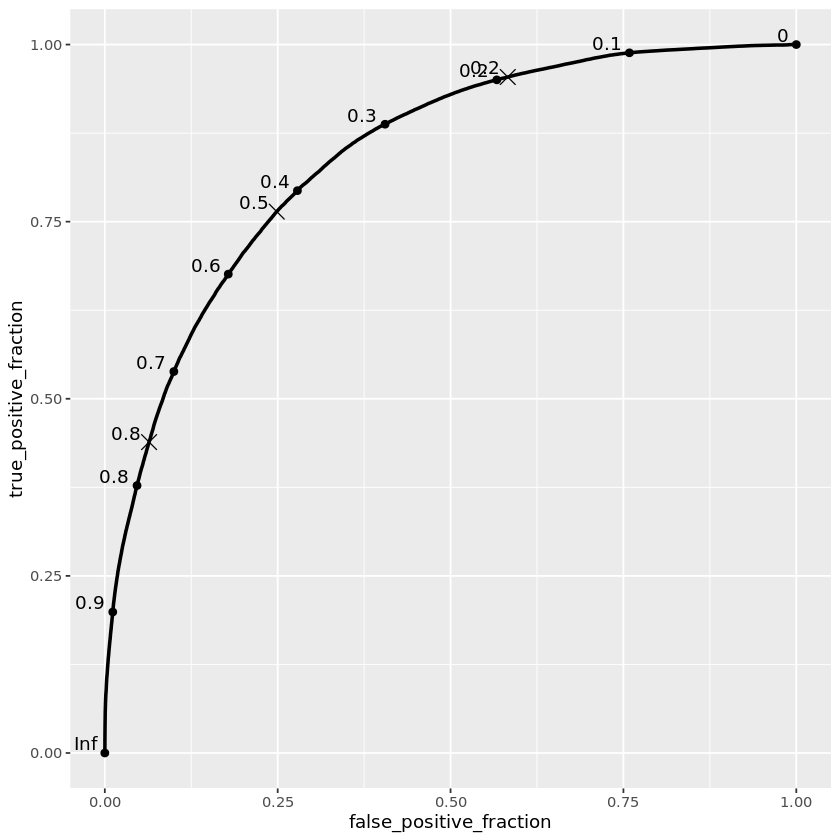

In [5]:
rdf<-summarizeResults(fitobj=reslst,what="residplot")
head(rdf)
cmdf<-rdf[,c("predicted","observed")]
cmdf$Predicted<-ifelse(cmdf$predicted>=0.5,"P","A")
cmdf$Observed<-ifelse(cmdf$observed==1,"P","A")
confusionMatrix(data=as.factor(cmdf$Predicted),reference=as.factor(cmdf$Observed),positive="P")
ggplot(rdf, aes(m = predicted, d = observed)) + geom_roc() + geom_rocci()

The curve looks good, and accuracy is 76%.

In [6]:
#THIS IS THE SECOND MODEL reslst2 WITH NO OCT5YRS AT ALL
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst2<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres2<-summarizeResults(fitobj=reslst2,what="gof")

In [7]:
#Example printing coefficients - do where needed
coefres<-summarizeResults(fitobj=reslst2,what="coefs")
row.names(coefres)<-NULL
print(coefres)

                       Parameter Coefficient StError z_value Prob_t Nboot
1                    (Intercept)      89.842  13.179   6.802  0.000   100
2                scaledmeanslope       0.469   0.149   3.157  0.010   100
3           I(scaledmeanslope^2)      -0.092   0.034  -2.719  0.028   100
4                   logmeanbathy       0.306   0.081   3.767  0.002   100
5                  adpepresentno     -14.616   3.959  -3.693  0.004   100
6                    logadpedist       2.256   0.953   2.377  0.049   100
7                  empepresentno      12.411   3.540   3.454  0.009   100
8                    logempedist     -12.471   1.535  -8.089  0.000   100
9               I(logempedist^2)       0.570   0.073   7.796  0.000   100
10              I(logadpedist^2)      -0.140   0.052  -2.715  0.026   100
11                  logEMPEabund      -0.097   0.045  -2.130  0.075   100
12                  logADPEabund       0.001   0.046   0.021  0.562   100
13                 RegionA-B-WAP     -

In [8]:
#THIS IS THE THIRD MODEL restlst3 WITH NO REGION-OCTOBER5YRS INTERACTION
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst3<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres3<-summarizeResults(fitobj=reslst3,what="gof")

In [ ]:
#THIS IS THE FOURTH MODEL restlst4 NO 300CONTDIST AT ALL
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst4<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres4<-summarizeResults(fitobj=reslst4,what="gof")

In [ ]:
#THIS IS THE FIFTH MODEL restlst5 NO 300CONTDIST-REGION INTERACTION
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst5<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres5<-summarizeResults(fitobj=reslst5,what="gof")
## Note: not indicating the family so it defaults to "gaussian" and fits a simple regression

In [ ]:
#THIS IS THE SIXTH MODEL restlst6 FAST ICE RATIO AT ALL
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*logglacierdist")
reslst6<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres6<-summarizeResults(fitobj=reslst6,what="gof")

In [ ]:
#THIS IS SIXTH MODEL
gofres<-summarizeResults(fitobj=reslst6,what="gof")
print(gofres)

In [ ]:
#NO FAST ICE RATIO AT ALL
coefres<-summarizeResults(fitobj=reslst6,what="coefs")
row.names(coefres)<-NULL
print(coefres)

In [ ]:
#THIS IS THE SEVENTH MODEL restlst7 NO REGION-FAST ICE RATIO INTERACTION
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "fastIceRatio+Region*logglacierdist")
reslst7<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres7<-summarizeResults(fitobj=reslst7,what="gof")

In [ ]:
#THIS IS THE EIGHTH MODEL restlst8 NO GLACIERDIST AT ALL
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio")
reslst8<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres8<-summarizeResults(fitobj=reslst8,what="gof")

In [ ]:
#THIS IS THE NINTH MODEL restlst9, NO GLACIERDIST-REGION INTERACTION
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+logglacierdist")
reslst9<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres9<-summarizeResults(fitobj=reslst9,what="gof")

In [ ]:
#THIS IS THE TENTH MODEL restlst10, NO ADPEABUNDANCE AT ALL
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst10<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres10<-summarizeResults(fitobj=reslst10,what="gof")

In [ ]:
#THIS IS THE ELEVENTH MODEL restlst11, NO ADPEABUNDANCE-REGION
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
reslst11<-fitModelToBootstrap(fml=fml,datalist=bootsamp,fam="binomial")
gofres11<-summarizeResults(fitobj=reslst11,what="gof")

In [ ]:
#View the GOF results
goflst<-list(Full=gofres,No_Oct5Yrs=gofres2,Region_Oct5Yrs=gofres3,No_Dist300m=gofres4,
             Region_Dist300=gofres5,No_FastIceRatio=gofres6,Region_FastIceRatio=gofres7,No_GlacierDist=gofres8,
             Region_GlacierDist=gofres9,NoADPEabund=gofres10,Region_ADPEabund=gofres11)
modnames<-names(goflst)
ldply(1:NROW(goflst),function(gg,goflst,modnames){
    gofv<-goflst[[gg]]
    mnm<-modnames[gg]
    tdf<-as.data.frame(t(gofv));tdf<-tdf[2,]
    tdf$model<-paste("Model",gg)
    tdf$modelName<-mnm
    return(tdf)
},goflst=goflst,modnames=modnames)

In [ ]:
#Using the above example models 2-6 for now - but Michelle will change/add more to these...
lrtdf_12<-getLRtest(reslst=reslst,contr=reslst2)
lrtdf_13<-getLRtest(reslst=reslst,contr=reslst3)
lrtdf_14<-getLRtest(reslst=reslst,contr=reslst4)
lrtdf_15<-getLRtest(reslst=reslst,contr=reslst5)
lrtdf_16<-getLRtest(reslst=reslst,contr=reslst6)
lrtdf_17<-getLRtest(reslst=reslst,contr=reslst7)
lrtdf_18<-getLRtest(reslst=reslst,contr=reslst8)
lrtdf_19<-getLRtest(reslst=reslst,contr=reslst9)
lrtdf_20<-getLRtest(reslst=reslst,contr=reslst10)
lrtdf_21<-getLRtest(reslst=reslst,contr=reslst11)
#... add the rest of the model contrasts above - should total 10 models (+ full), so 10 lrtdf_1#
#then...
lrtlst<-list(No_Oct5Yrs=lrtdf_12,Region_Oct5Yrs=lrtdf_13,No_Dist300m=lrtdf_14,
             Region_Dist300=lrtdf_15,No_FastIceRatio=lrtdf_16,Region_FastIceRatio=lrtdf_17,No_GlacierDist=lrtdf_18,
             Region_GlacierDist=lrtdf_19,NoADPEabund=lrtdf_20,Region_ADPEabund=lrtdf_21)
nlrtm<-names(lrtlst)

ldply(1:NROW(lrtlst),function(tt,lrtlst,nlrtm){
    lrtm<-lrtlst[[tt]];lrtn<-nlrtm[tt]
    lrtt<-round(as.numeric(summary(lrtm$PrChisq)),4)
    pctsig<-sum(lrtm$PrChisq<0.05)
    tdf<-data.frame(Model=lrtn,Mean_prChisq=lrtt[4],Median_prChisq=lrtt[3],Max_prChisq=lrtt[6],PctSig=pctsig)
    return(tdf)
},lrtlst=lrtlst,nlrtm=nlrtm)


Above we report the mean and maximum value of the prb. Chisq of the effect. The probabilities are indeed a distribution of values, as shown below.

In [ ]:
## Example to show the distribution of values
ggplot(data=lrtdf_16,aes(x=PrChisq)) + geom_histogram() 

In [ ]:
sum(lrtdf_17$PrChisq<0.05)

## Partial dependence plots

In [14]:
#This is the full model, with all interactions
fml<-paste0("presence~scaledmeanslope+I(scaledmeanslope^2)+logmeanbathy+adpepresent*logadpedist+empepresent*logempedist+",
            "I(logempedist^2)+I(logadpedist^2)+logEMPEabund+logADPEabund*Region+Region*PredictabilityOct5Years+",
            "logdistToShore+I(logdistToShore^2)+Region*logcont300dist+InCanyon+",
            "Region*fastIceRatio+Region*logglacierdist")
#Need this description of the data
varDesc<-getVarDesc(data=wesedf2,fml=fml)
head(varDesc)

,var,minv,maxv,meanv,medv,modv
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,scaledmeanslope,8.312824e-07,10.67303,0.6429639,0.3885376,NA
2,logmeanbathy,-7.938042e+00,-2.06480,-5.6711849,-5.7729198,NA
3,adpepresent,NA,NA,NA,NA,"[""no"",""yes""]"
4,logadpedist,5.316402e+00,14.30962,11.5453116,11.6770628,NA
5,empepresent,NA,NA,NA,NA,"[""yes"",""no""]"
6,logempedist,4.984499e+00,13.24255,11.3936267,11.5049717,NA


,logadpedist,predicted,lcl,ucl,adpedist,probWESEpresent
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.316402,-2.146679,-5.860038,1.266759,0.2036498,0.1046420
2,5.407243,-2.061511,-5.652547,1.215523,0.2230158,0.1128944
3,5.498083,-1.979088,-5.451183,1.164852,0.2442233,0.1214161
4,5.588924,-1.899409,-5.255953,1.114750,0.2674476,0.1301754
5,5.679764,-1.822474,-5.066862,1.065222,0.2928804,0.1391373
6,5.770605,-1.748284,-4.883915,1.016271,0.3207317,0.1482638


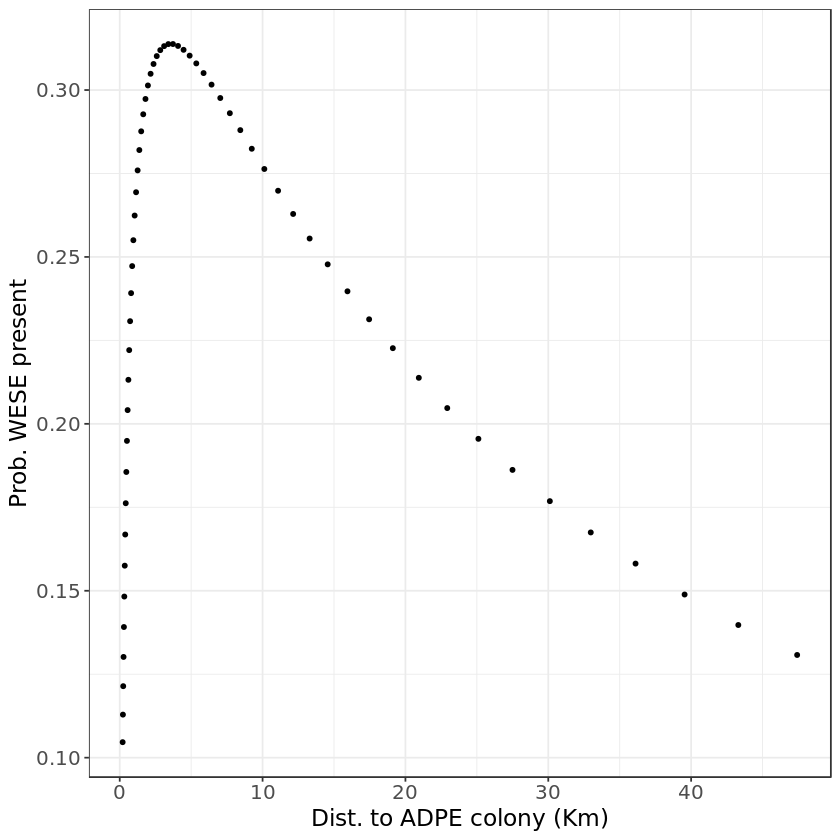

In [15]:
#1D partial dependence plot
newdata<-getNewData(varDesc=varDesc,pdvars="logadpedist",useMedian=FALSE)
pddata<-getpdData(reslst=reslst,newdata=newdata,pdvars="logadpedist",type="glm")
pddata$adpedist<-exp(pddata$logadpedist)/1000
pddata$probWESEpresent<-exp(pddata$predicted)/(1+exp(pddata$predicted))
head(pddata)
ggplot(subset(pddata,adpedist<50),aes(x=adpedist,y=probWESEpresent)) + 
    #geom_bar(stat="freq")
    #geom_ribbon(aes(ymin=lcl,ymax=ucl),fill="light gray",alpha=0.5) + 
    geom_point(size=1,color="black") + labs(x="Dist. to ADPE colony (Km)",y="Prob. WESE present") +
    theme_bw() + theme(axis.text=element_text(size=12), axis.title=element_text(size=14))

### 2D plot
Need to generate the data first...

In [ ]:
newdata<-getNewData(varDesc=varDesc,pdvars=c("logempedist","logEMPEabund"),useMedian=FALSE)
pddata<-getpdData(reslst=reslst,newdata=newdata,pdvars=c("logempedist","logEMPEabund"),type="glm")
zm<-matrix(pddata$predicted,ncol=100,byrow=F)
persp3D(x=unique(pddata$logEMPEabund),y=unique(pddata$logempedist),z=zm,box=T,axes=T,ticktype="detailed",
        xlab="logEMPEabund",ylab="log(EMPEdist)",zlab="logit(seal_presence)")